# data collection

In [39]:
pip install yfinance

# data input

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# data downloading

In [3]:
data = yf.download("BIIB", start="2020-10-01", end="2021-11-30")

[*********************100%***********************]  1 of 1 completed


data description 

In [11]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02
mean,287.083062,291.696020,282.926735,287.213639,287.213639,1.429499e+06
std,38.128287,40.581606,37.084867,38.701507,38.701507,1.644407e+06
min,230.820007,239.500000,223.250000,236.110001,236.110001,6.000000e+02
25%,265.275002,268.735001,261.794998,265.194992,265.194992,8.827500e+05
50%,274.285004,279.325012,270.850006,274.520004,274.520004,1.060550e+06
75%,299.724998,302.457504,295.000000,299.570000,299.570000,1.379550e+06
max,423.329987,468.549988,404.250000,414.709991,414.709991,1.795410e+07


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

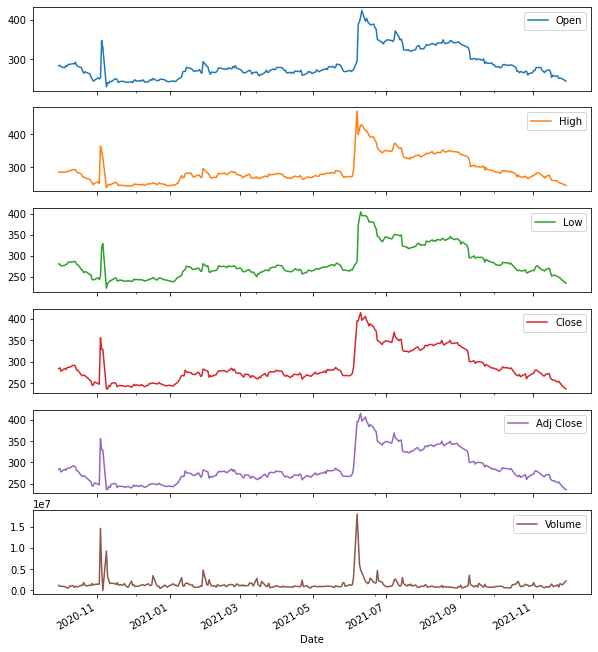

In [33]:
data.plot(figsize=(10, 12), subplots=True)

In [12]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,283.869995,284.850006,280.790009,283.679993,283.679993,1200000
2020-10-01,284.959991,286.170013,280.589996,285.570007,285.570007,971600
2020-10-02,281.649994,285.470001,276.059998,277.640015,277.640015,976000
2020-10-05,278.670013,285.920013,277.359985,284.179993,284.179993,888000
2020-10-06,284.170013,285.899994,279.390015,281.149994,281.149994,758100


In [13]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-22,257.970001,258.890015,250.669998,252.210007,252.210007,1290300
2021-11-23,252.070007,254.449997,249.520004,254.149994,254.149994,799100
2021-11-24,253.179993,253.179993,247.660004,250.130005,250.130005,1579800
2021-11-26,250.779999,250.779999,242.020004,242.899994,242.899994,1300400
2021-11-29,245.360001,245.500000,235.179993,236.110001,236.110001,2229100


normal return from the data

In [18]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[0.006662488357427461,
 -0.027768996996866063,
 0.02355560323545227,
 -0.010662252295691264,
 0.016361394996897226]

log return from the data

In [19]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[0.006640392071737657,
 -0.028161845347115202,
 0.02328245120483556,
 -0.010719501407658604,
 0.01622898964581728]

# annualized volatility of biogen inc. in normal return.

In [44]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.9f and its annulized volatility is %.9f' % (nr,nv))

The annulized normal return is 0.048059345 and its annulized volatility is 0.719178126


# annualized volatility of biogen inc. in log return.

In [43]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.9f and its annulized volatility is %.9f' % (lr,lv))

The annulized log return is -0.183549016 and its annulized volatility is 0.667926214


Closing price of biogen inc.

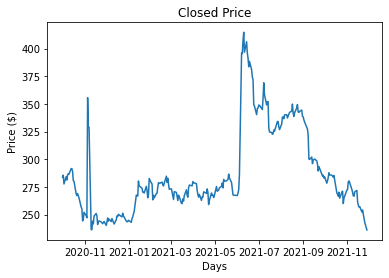

In [35]:
fig = plt.figure()
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

# graph of annualized volatility of biogen inc.

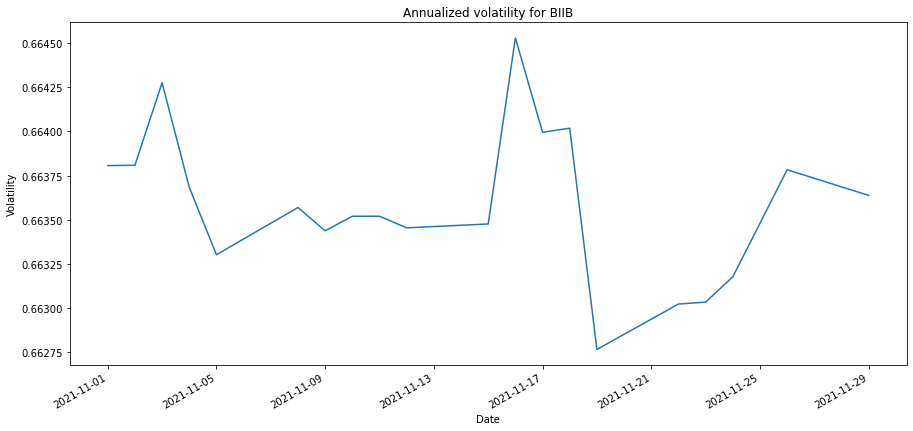

In [31]:
TRADING_DAYS = 275
returns = np.log(data['Close']/data['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for BIIB')
plt.show()

# Methodology

# binary option

In [45]:
import numpy as np
import os

In [46]:
S0 = 250.0              # spot stock price
K = 250.0               # strike
T = 0.6                 # maturity 
r = 0.2                 # risk free rate 
sig = 0.1               # diffusion coefficient or volatility
N = 2                   # number of periods or number of time steps  
payoff = "put"          # payoff

# Bionomial Tree 

In [48]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [49]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [50]:
S

array([[250.        , 264.07500526, 278.9424336 ],
       [  0.        , 236.67518226, 250.        ],
       [  0.        ,   0.        , 224.0605676 ]])

In [51]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

1.0505160701458414

# option value for each final node

In [52]:
S_T = S[:,-2]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  13.32481774],
       [  0.        ,   0.        , 250.        ]])

# European option for Bionomial tree

In [56]:
for j in range(N-2, -2, -2):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 2] + q * V[i + 2,j + 2])
V

array([[-11.89356081,   0.        ,   0.        ],
       [  0.        ,   0.        ,  13.32481774],
       [  0.        ,   0.        , 250.        ]])

In [57]:
print('European ' + payoff, str( V[0,0]))

European put -11.89356080985187


# Monte Carlo Simulation

In [58]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 2, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [67]:
T = 0.6
r = 0.2
sigma = 0.1
S0 = 250
K = 250

In [68]:
S = mcs_simulation_np(2000)

In [69]:
S = np.transpose(S)
S

array([[250.        , 249.97534476, 250.3595934 , ..., 293.89528146,
        294.06275536,   0.        ],
       [250.        , 250.68934395, 250.50807688, ..., 279.23809811,
        279.95106427,   0.        ],
       [250.        , 249.6331843 , 249.92950992, ..., 276.31510963,
        275.78036914,   0.        ],
       ...,
       [250.        , 249.37120933, 249.44237752, ..., 283.04301908,
        283.11230497,   0.        ],
       [250.        , 250.1247477 , 250.34764283, ..., 303.25418121,
        303.10592489,   0.        ],
       [250.        , 249.66108943, 250.1097948 , ..., 259.00692845,
        258.62335577,   0.        ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

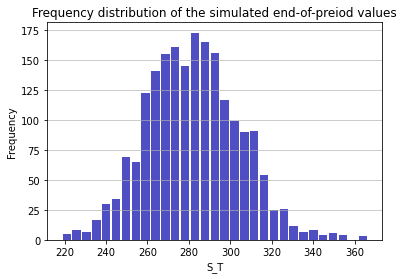

In [70]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-2], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.80)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [71]:
p = np.mean(np.maximum(K - S[:,-2],0))
print('European put', str(p))

European put 0.6132615599697999


In [72]:
c = np.mean(np.maximum(S[:,-2] - K,0))
print('European call', str(c))

European call 32.71842983485504


# Analysis Of DATA

# Greeks

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [74]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 2.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 2.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 2.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 2.0)
    
    return option_value

In [75]:
euro_option_bsm(250, 250, 1, 0.05, 0.03, 0.25, 'call')

14.43985961074489

In [76]:
euro_option_bsm(250, 250, 1, 0.05, 0.03, 0.25, 'put')

9.635832348796356

In [77]:
S = np.linspace(50,150,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 250, 1, 0.05, 0.03, 0.25, 'call')
    Put [i] = euro_option_bsm(S[i], 250, 1, 0.05, 0.03, 0.25, 'put')

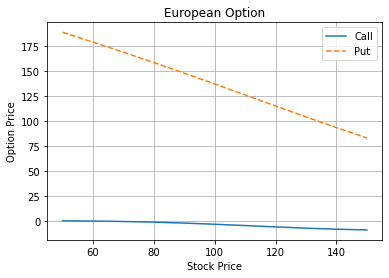

In [78]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Delta

In [79]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [80]:
delta(250, 250, 1, 0.05, 0.03, 0.25, 'call')

0.564036469670836

In [81]:
delta(250, 250, 1, 0.05, 0.03, 0.25, 'put')

-0.4064090638776723

In [82]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 250, 1, 0.05, 0.03, 0.25, 'call')
    Delta_Put [i] = delta(S[i], 250, 1, 0.05, 0.03, 0.25, 'put')

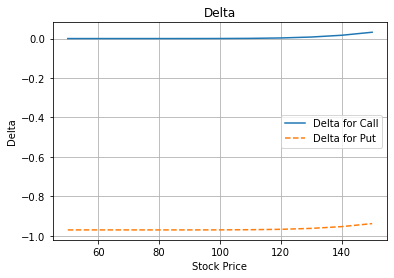

In [83]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

# Gamma

In [84]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [85]:
gamma(250, 250, 1, 0.05, 0.03, 0.25, 'call')

0.006065625616630684

In [86]:
gamma(250, 250, 1, 0.05, 0.03, 0.25, 'put')

0.006065625616630684

In [87]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 250, 1, 0.05, 0.03, 0.25, 'call')

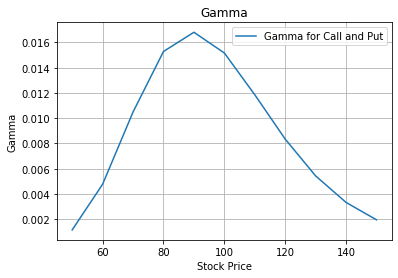

In [88]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [89]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [90]:
speed(250, 250, 1, 0.05, 0.03, 0.25, 'call')

-4.415775448907138e-05

In [91]:
speed(250, 250, 1, 0.05, 0.03, 0.25, 'put')

-4.415775448907138e-05

In [92]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 250, 1, 0.05, 0.03, 0.25, 'call')

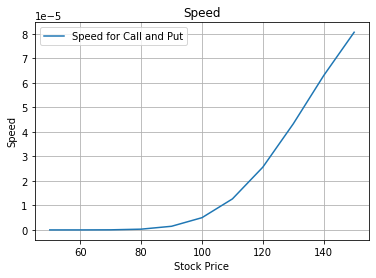

In [93]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

# Theta

In [94]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [95]:
theta(250, 250, 1, 0.05, 0.03, 0.25, 'call')

13.348446764043556

In [96]:
theta(250, 250, 1, 0.05, 0.03, 0.25, 'put')

14.957429605565167

In [97]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(250, 250, T[i], 0.05, 0.03, 0.25, 'call')
    Theta_Put [i] = theta(250, 250, T[i], 0.05, 0.03, 0.25, 'put')

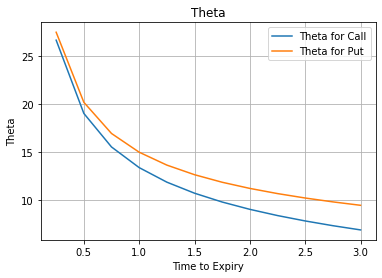

In [98]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

# Rho

In [99]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [100]:
rho(250, 250, 1, 0.05, 0.03, 0.25, 'call')

114.63590508186041

In [101]:
rho(250, 250, 1, 0.05, 0.03, 0.25, 'put')

-123.17145104331807

In [102]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(250, 250, 1, r[i], 0.03, 0.25, 'call')
    Rho_Put [i] = rho(250, 250, 1, r[i], 0.03, 0.25, 'put')

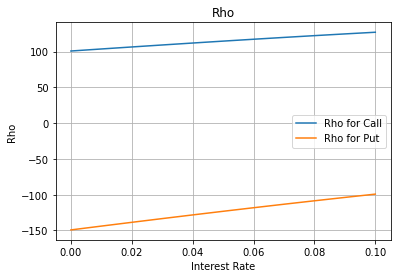

In [103]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])